In [1]:
# The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

# You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:


# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)


# In addition, you will be expected to produce the following three pie charts:


# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type


# As final considerations:


# You must use the Pandas Library and the Jupyter Notebook.
# You must use the Matplotlib library.
# You must include a written description of three observable trends based on the data.
# You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# Remember when making your plots to consider aesthetics!


# You must stick to the Pyber color scheme (Gold, SkyBlue, and Coral) in producing your plot and pie charts.
# When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
# When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.



In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


# File to Load (Remember to change these)
# city headers ***city, driver_count, type***
# ride headers ***city, date, fare, ride_id***
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
City_Data = pd.read_csv(city_data)
Ride_Data = pd.read_csv(ride_data)

# Combine the data into a single dataset
Combined_Data = pd.merge(Ride_Data, City_Data, on='city')

# # Display the data table for preview
Combined_Data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
Rural =  Combined_Data['type']== "Rural"
Rural_DF = Combined_Data[Rural]

Urban =  Combined_Data['type']== "Urban"
Urban_DF = Combined_Data[Urban]

Suburban =  Combined_Data['type']== "Suburban"
Suburban_DF = Combined_Data[Suburban]

# Rural_DF.head()
# Urban_DF.head()
# Suburban_DF.head()

Suburban_DF.head(2)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,Barronchester,2018-05-05 04:03:11,30.38,2281522828169,11,Suburban


In [4]:
# Average Fare ($) Per City == Calculated on the y_axis
# Total Number of Rides Per City == Calculated on the x_axis
# Total Number of Drivers Per City == Size of the circles

Rural_Average_Fair = Rural_DF.groupby("city")["fare"].mean ()
Rural_Rider_Count = Rural_DF.groupby("city")["ride_id"].count ()
Rural_Driver_Count = Rural_DF.groupby("city")["driver_count"].mean ()

Urban_Average_Fair = Urban_DF.groupby("city")["fare"].mean ()
Urban_Rider_Count = Urban_DF.groupby("city")["ride_id"].count ()
Urban_Driver_Count = Urban_DF.groupby("city")["driver_count"].mean ()

Suburban_Average_Fair = Suburban_DF.groupby("city")["fare"].mean ()
Suburban_Rider_Count = Suburban_DF.groupby("city")["ride_id"].count ()
Suburban_Driver_Count = Suburban_DF.groupby("city")["driver_count"].mean ()
Rural_Rider_Count.head(50)

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

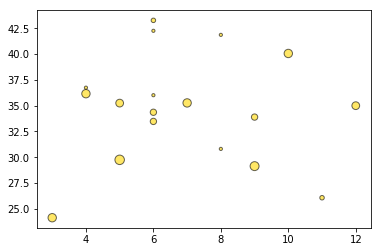

In [5]:
plt.scatter(Rural_Rider_Count, Rural_Average_Fair, facecolors= "Gold",edgecolors= "Black", s=Rural_Driver_Count*10, alpha=.6, label ='Rural')
# plt.scatter(Urban_Rider_Count, Urban_Average_Fair, facecolors= "Coral",edgecolor= "Black", s=Urban_Driver_Count*10, alpha=.6, label ='Urban')
# plt.scatter(Suburban_Rider_Count, Suburban_Average_Fair, facecolors= "SkyBlue",edgecolor= "Black", s=Suburban_Driver_Count*10, alpha=.6, label ='Suburban')

# plt.title('Pybar Ride Sharing Data (2016)')
# plt.text(45,30,'Note : Size of Bubble Corresponds to Number of Drivers per City', fontsize = 10)
# plt.xlabel('Number of Rides per City')
# plt.ylabel('Average Fare per City') 

# lgnd = plt.legend(frameon = True, title = 'City Types', edgecolor = 'Black', loc="best")
# lgnd.legendHandles[0]._sizes = [40]
# lgnd.legendHandles[1]._sizes = [40]
# lgnd.legendHandles[2]._sizes = [40]

plt.savefig("RideSharingData.png", bbox_inches="tight")



In [6]:
Total_Fare = Combined_Data["fare"].sum()
Total_Rural_Fare = Rural_DF["fare"].sum()
Total_Urban_Fare = Urban_DF["fare"].sum()
Total_Suburban_Fare = Suburban_DF["fare"].sum()

In [7]:
Percent_Rural_Fare = (Total_Rural_Fare/Total_Fare)*100
Percent_Urban_Fare = (Total_Urban_Fare/Total_Fare)*100
Percent_Suburban_Fare = (Total_Suburban_Fare/Total_Fare)*100

In [8]:
 # Labels for the sections of our pie chart
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
Pie_Size1 = [Percent_Rural_Fare, Percent_Urban_Fare, Percent_Suburban_Fare]

# The colors of each section of the pie chart
colors = ["Gold", "Coral", "SkyBlue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.2, 0)

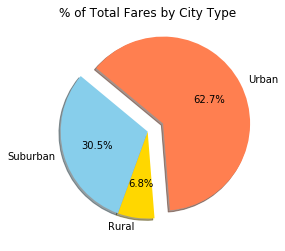

In [9]:
plt.pie(Pie_Size1, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)
plt.title('% of Total Fares by City Type')
# Save Figure
plt.savefig("FaresbyType.png")

 # Show Figure
plt.show()

In [12]:
Total_Riders = Combined_Data["fare"].count()
Total_Rural_Riders2 = Rural_DF["fare"].count()
Total_Urban_Riders2 = Urban_DF["fare"].count()
Total_Suburban_Riders = Suburban_DF["fare"].count()

In [13]:
Percent_Rural_Riders = (Total_Rural_Riders/Total_Riders)*100
Percent_Urban_Riders = (Total_Urban_Riders/Total_Riders)*100
Percent_Suburban_Riders = (Total_Suburban_Riders/Total_Riders)*100

Total_Count = Percent_Rural_Riders + Percent_Urban_Riders + Percent_Suburban_Riders
Total_Count

NameError: name 'Total_Rural_Riders' is not defined

In [175]:
# The values of each section of the pie chart
Pie_Size2 = [Percent_Rural_Riders, Percent_Urban_Riders, Percent_Suburban_Riders]


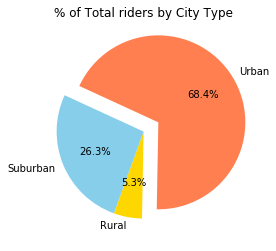

In [184]:
##Total Rides by City Type##
# Calculate Ride Percents

# Build Pie Chart
plt.pie(Pie_Size2, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=250)
plt.title('% of Total riders by City Type')
# Save Figure
plt.savefig("RidersbyType.png")

 # Show Figure
plt.show()

In [197]:
# Total Drivers by City Type
Total_Drivers2 = City_Data["driver_count"].sum()

Total_Rural_Drivers = 78
Total_Urban_Drivers = 2405
Total_Suburban_Drivers = 490
# Calculate Driver Percents
Percent_Rural_Drivers = (Total_Rural_Drivers/Total_Drivers2)*100
Percent_Urban_Drivers = (Total_Urban_Drivers/Total_Drivers2)*100
Percent_Suburban_Drivers = (Total_Suburban_Drivers/Total_Drivers2)*100


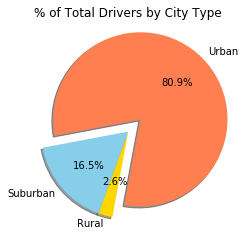

In [198]:

# Build Pie Charts
Pie_Size3 = [Percent_Rural_Drivers, Percent_Urban_Drivers, Percent_Suburban_Drivers]
plt.pie(Pie_Size3, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)

# Save Figure
plt.savefig("RidersbyType.png")

plt.savefig("RidersbyType.png")
plt.title('% of Total Drivers by City Type')

# Save Figure
# Show Figure
plt.show()